**Author:** Taiga Schwarz  
**Date Created:** 2/17/21  

# <center>Digit Recognizer Project:</center> 


## Project Overview:

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this project, my goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. It is worth noting that this is a knowledge-oriented project from Kaggle, which has a curated a set of tutorial-style kernels that cover everything from regression to neural networks.

### Import Packages:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data Set:

In [18]:
# train data
train_df = pd.read_csv("digit-recognizer-data/train.csv")
# test data
test_df = pd.read_csv("digit-recognizer-data/test.csv")

## Data Visualization:

In [19]:
# train data and test data shape
print("train data shape: ", train_df.shape)
print("test data shape: ", test_df.shape)

train data shape:  (42000, 785)
test data shape:  (28000, 784)


In [20]:
# train data summary
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [21]:
# check to see if any null values exist in train data
train_df.isnull().values.any()

False

**Questions:**
- What do the pixel values mean?
    - **Each image is 28 x 28 pixels for a total of 784 pixels. Each pixel is assigned an integer value within the interval \[0, 255\] indicating its level of darkness, where higher values correspond to higher levels of darkness.**
     
    <br>
    
- Are there any null values? (most likely not for this data set but good practice to check)
    - **No, there are no null values.**
    
    <br>
    
- What are the columns? What are the rows?
    - **The "label" column is the digit drawn by the user. The other columns contain the pixel-values of the associated image.**
    - **Each row is associated with an image.**

In [22]:
# separate "label" column from input variables in train data
Y_train = train_df["label"]
X_train = train_df.drop(labels = ["label"], axis = 1) 

In [23]:
# create an array containing 28x28 subarrays for each image
images = X_train.values.reshape([42000, 28, 28])

In [24]:
# visualize distribution of "label" values

# plt.figure(figsize=(15,7))
# plt.hist(Y_train, bins = np.arange(11)-0.5, edgecolor = 'white')
# numbers = [x for x in range(0,10)]
# labels = map(lambda x: str(x), numbers)
# plt.xticks(numbers, labels)
# plt.title('Histogram of "Label"')
# plt.show()

/Users/taigaschwarz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

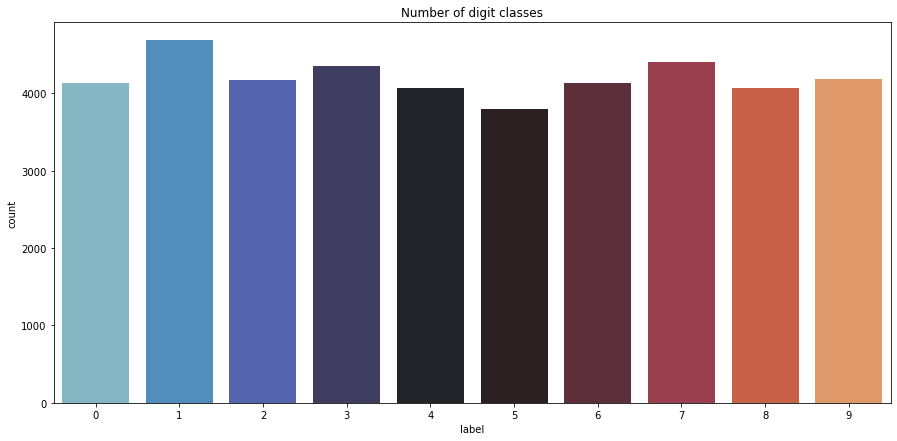

In [25]:
# visualize distribution of "label" values -- example using seaborn
plt.figure(figsize=(15,7))
graph = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

The distribution of the digit classes is closed to balanced, thus there should not be an issue with having any of the labels underrepresented by the model.

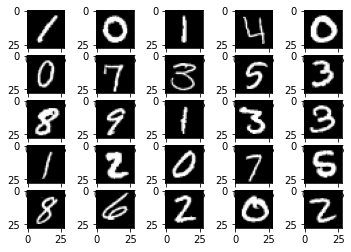

In [26]:
# plot the images 
n_rows, n_cols = 5, 5
fig, ax = plt.subplots(n_rows, n_cols)
counter = 0

for i in range(n_rows*n_cols):
    y_pos = counter // n_rows
    x_pos = counter % n_cols
    ax[y_pos][x_pos].imshow(images[counter], cmap = "gray") 
    counter += 1

## Data Normalization and Preparation for Modeling

In [27]:
# normalize pixel values to 0-1 scale
X_train = X_train/255
test_df = test_df/255

In [28]:
# reshape all data to 28x28x1 3D matrices -- Keras needs an extra dimension in the end which correspond to channels
X_train = X_train.values.reshape(-1, 28, 28, 1)  # -1 tells numpy to figure out the array length given the other dim
test_df = test_df.values.reshape(-1 , 28, 28, 1)
print("train data shape: ", X_train.shape)
print("test data shape: ", test_df.shape)

train data shape:  (42000, 28, 28, 1)
test data shape:  (28000, 28, 28, 1)


In [29]:
# label encoding -- convert to one-hot-encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

### Train Test Split  
- Test size = 10%
- Train size = 90%

We can probably play around with these proportions to see how much the training results depend on them.

In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", Y_train.shape)
print("y_test shape: ", Y_test.shape)

x_train shape:  (37800, 28, 28, 1)
x_test shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_test shape:  (4200, 10)


## Model Creation - Convolutional Neural Network

**Create model:**

In [31]:
# import packages
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# define model
model = Sequential()

# add first layer of conv filter, max pooling, and dropout
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# add second layer of conv filter, max pooling, and dropout
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

**Define optimizer:**

In [32]:
# define Adam optimizer
# optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

**Compile model:**

In [33]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])

**Set epoch and batch size:**

In [34]:
epochs = 10  # for better result increase the epochs
batch_size = 250

**Data Augmentation:**  
- Make small changes to the orientation and/or scale of the training images to artifically expand the trainig data. This will help prevent overfitting.

In [35]:
# data augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

**Fit the model:**

In [37]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size = batch_size),
                              epochs = epochs, 
                              validation_data = (X_test,Y_test), 
                              steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 10s 66ms/step - loss: 0.1543 - accuracy: 0.9535 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 2/10
151/151 [==============================] - 10s 63ms/step - loss: 0.1483 - accuracy: 0.9541 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 3/10
151/151 [==============================] - 9s 62ms/step - loss: 0.1378 - accuracy: 0.9564 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoch 4/10
151/151 [==============================] - 10s 64ms/step - loss: 0.1367 - accuracy: 0.9579 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 5/10
151/151 [==============================] - 10s 65ms/step - loss: 0.1303 - accuracy: 0.9598 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 6/10
151/151 [==============================] - 10s 63ms/step - loss: 0.1305 - accuracy: 0.9611 - val_loss: 0.0414 - val_accuracy: 0.9876
Epoch 7/10
151/151 [==============================] - 10s 65ms/step - loss: 0.1226 - accuracy: 0.9620 - val_loss: 0.0372 - val_accuracy: 

## Evaluate the Model:

**Test Loss History:**

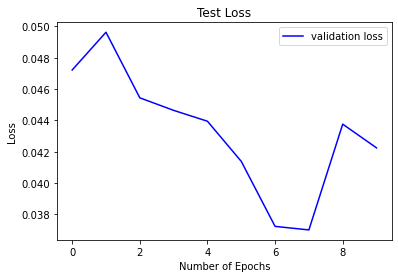

In [38]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color = 'b', label = "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

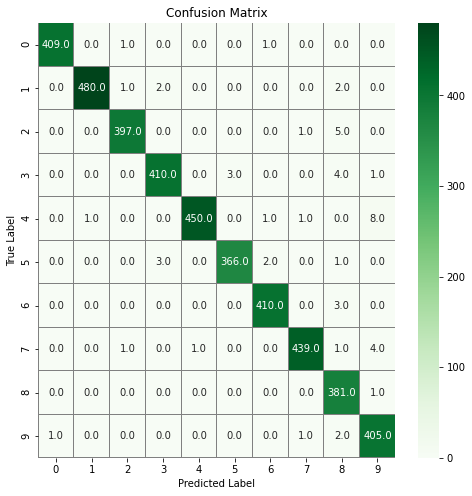

In [39]:
# confusion matrix

import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize = (8, 8))
sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap = "Greens", 
            linecolor = "gray", fmt = '.1f',ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()